In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import pickle

In [2]:
raw_data = pd.read_csv('./datasets/samsung200101_220328.KS.csv')
print(raw_data.head())
raw_data.info()

         Date     Open     High      Low    Close     Adj Close    Volume
0  2020-01-02  55500.0  56000.0  55000.0  55200.0  51824.093750  12993228
1  2020-01-03  56000.0  56600.0  54900.0  55500.0  52105.750000  15422255
2  2020-01-06  54900.0  55600.0  54600.0  55500.0  52105.750000  10278951
3  2020-01-07  55700.0  56400.0  55600.0  55800.0  52387.406250  10009778
4  2020-01-08  56200.0  57400.0  55900.0  56800.0  53326.242188  23501171
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       551 non-null    object 
 1   Open       551 non-null    float64
 2   High       551 non-null    float64
 3   Low        551 non-null    float64
 4   Close      551 non-null    float64
 5   Adj Close  551 non-null    float64
 6   Volume     551 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 30.3+ KB


In [3]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace= True)
print(raw_data.head())

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-01-02  55500.0  56000.0  55000.0  55200.0  51824.093750  12993228
2020-01-03  56000.0  56600.0  54900.0  55500.0  52105.750000  15422255
2020-01-06  54900.0  55600.0  54600.0  55500.0  52105.750000  10278951
2020-01-07  55700.0  56400.0  55600.0  55800.0  52387.406250  10009778
2020-01-08  56200.0  57400.0  55900.0  56800.0  53326.242188  23501171


In [8]:
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(raw_data)
print(scaled_data[:5])
print(scaled_data.shape)

[[0.27044025 0.23380282 0.2690678  0.26185567 0.24103556 0.14387973]
 [0.28092243 0.24507042 0.26694915 0.26804124 0.24672939 0.17077741]
 [0.25786164 0.22629108 0.26059322 0.26804124 0.24672939 0.11382334]
 [0.27463312 0.24131455 0.28177966 0.2742268  0.25242322 0.11084267]
 [0.2851153  0.2600939  0.28813559 0.29484536 0.27140228 0.2602388 ]]
(551, 6)


In [13]:
sequence_X = []
sequence_Y = []

for i in range(len(scaled_data)-30):
  x = scaled_data[i:i+30]
  y = scaled_data[i+30][3] # 종가만 예측
  sequence_X.append(x)
  sequence_Y.append(y)

sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.27044025 0.23380282 0.2690678  0.26185567 0.24103556 0.14387973]
 [0.28092243 0.24507042 0.26694915 0.26804124 0.24672939 0.17077741]
 [0.25786164 0.22629108 0.26059322 0.26804124 0.24672939 0.11382334]
 [0.27463312 0.24131455 0.28177966 0.2742268  0.25242322 0.11084267]
 [0.2851153  0.2600939  0.28813559 0.29484536 0.27140228 0.2602388 ]
 [0.3312369  0.28262911 0.31991525 0.33195876 0.30556486 0.26689845]
 [0.33962264 0.30328638 0.33898305 0.35051546 0.32264619 0.17717692]
 [0.35639413 0.30892019 0.3559322  0.36082474 0.3321358  0.12578474]
 [0.37316562 0.32769953 0.37288136 0.36082474 0.3321358  0.18721084]
 [0.35429769 0.30140845 0.35169492 0.34020619 0.31315658 0.15836046]
 [0.34591195 0.32206573 0.35381356 0.37525773 0.34542119 0.15925571]
 [0.40461216 0.34647887 0.39618644 0.38762887 0.35680877 0.17745919]
 [0.4067086  0.36150235 0.41101695 0.41030928 0.3776858  0.13873752]
 [0.4067086  0.35399061 0.40042373 0.38969072 0.35870658 0.12338794]
 [0.37526205 0.35774648 0.38347458

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y , test_size=0.2)
xy = X_train, X_test, Y_train, Y_test
np.save('./samsung_preprocessed_30.npy', xy)

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [19]:
with open('./samsung_minmaxscaler.pickle', 'wb') as f:
  pickle.dump(minmaxscaler, f)

In [20]:
with open('./samsung_minmaxscaler.pickle', 'rb') as f:
  minmaxscaler = pickle.load(f)

In [21]:
model = Sequential()
model.add(LSTM(50, input_shape=(30,6), # scaled_data.shape의 형식과 맞게
               activation = 'tanh')) #LSTM은 activation으로 tanh, tanh는 -1 ~ 1 사이의 값
model.add(Flatten())
model.add(Dense(1)) # 예측한 값을 그래도 써야 하기 때문에 마지막에는 activation을 사용하지 않는다
model.compile(loss = 'mse', optimizer='adam') # 분류가 아니므로 metrics를 안 쓴다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11400     
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________


In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30)
fit_hist= model.fit(X_train, Y_train, batch_size=128, epochs= 500, callbacks=[early_stopping], verbose=1, validation_data = (X_test, Y_test), shuffle=False)

Epoch 1/500
4/4 [==============================] - 3s 176ms/step - loss: 0.2873 - val_loss: 0.0631
Epoch 2/500
4/4 [==============================] - 0s 28ms/step - loss: 0.0353 - val_loss: 0.0197
Epoch 3/500
4/4 [==============================] - 0s 28ms/step - loss: 0.0357 - val_loss: 0.0392
Epoch 4/500
4/4 [==============================] - 0s 28ms/step - loss: 0.0272 - val_loss: 0.0059
Epoch 5/500
4/4 [==============================] - 0s 27ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 6/500
4/4 [==============================] - 0s 27ms/step - loss: 0.0079 - val_loss: 0.0090
Epoch 7/500
4/4 [==============================] - 0s 28ms/step - loss: 0.0107 - val_loss: 0.0065
Epoch 8/500
4/4 [==============================] - 0s 28ms/step - loss: 0.0067 - val_loss: 0.0029
Epoch 9/500
4/4 [==============================] - 0s 27ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 10/500
4/4 [==============================] - 0s 27ms/step - loss: 0.0033 - val_loss: 0.0041
Epoch 11/500
4/4 [

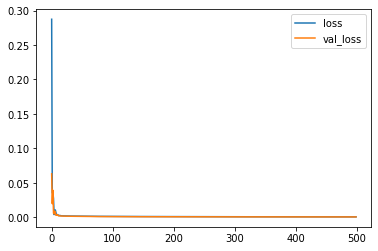

In [25]:
plt.plot(fit_hist.history['loss'], label = 'loss')
plt.plot(fit_hist.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [26]:
pred = model.predict(X_test)

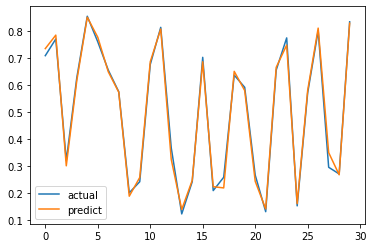

In [28]:
plt.plot(Y_test[:30], label = 'actual')
plt.plot(pred[:30], label = 'predict')
plt.legend()
plt.show()